13383.0    53533.14348731481   148.36581420898438   219.8470458984375
13284.0    53155.9093337637   148.3655242919922   219.8523712158203
11796.0    47215.421854914355   148.22787475585938   219.8168487548828
11701.0    46848.44953953018   148.18032836914062   219.8375244140625
15814.5    63266.17704736227   306.188720703125   132.66769409179688
15710.5    62860.0128735116   306.1865539550781   132.67031860351562
13939.0    55771.4929424612   306.4507141113281   132.30902099609375
13829.0    54475.58277708526   304.9262390136719   132.45533752441406


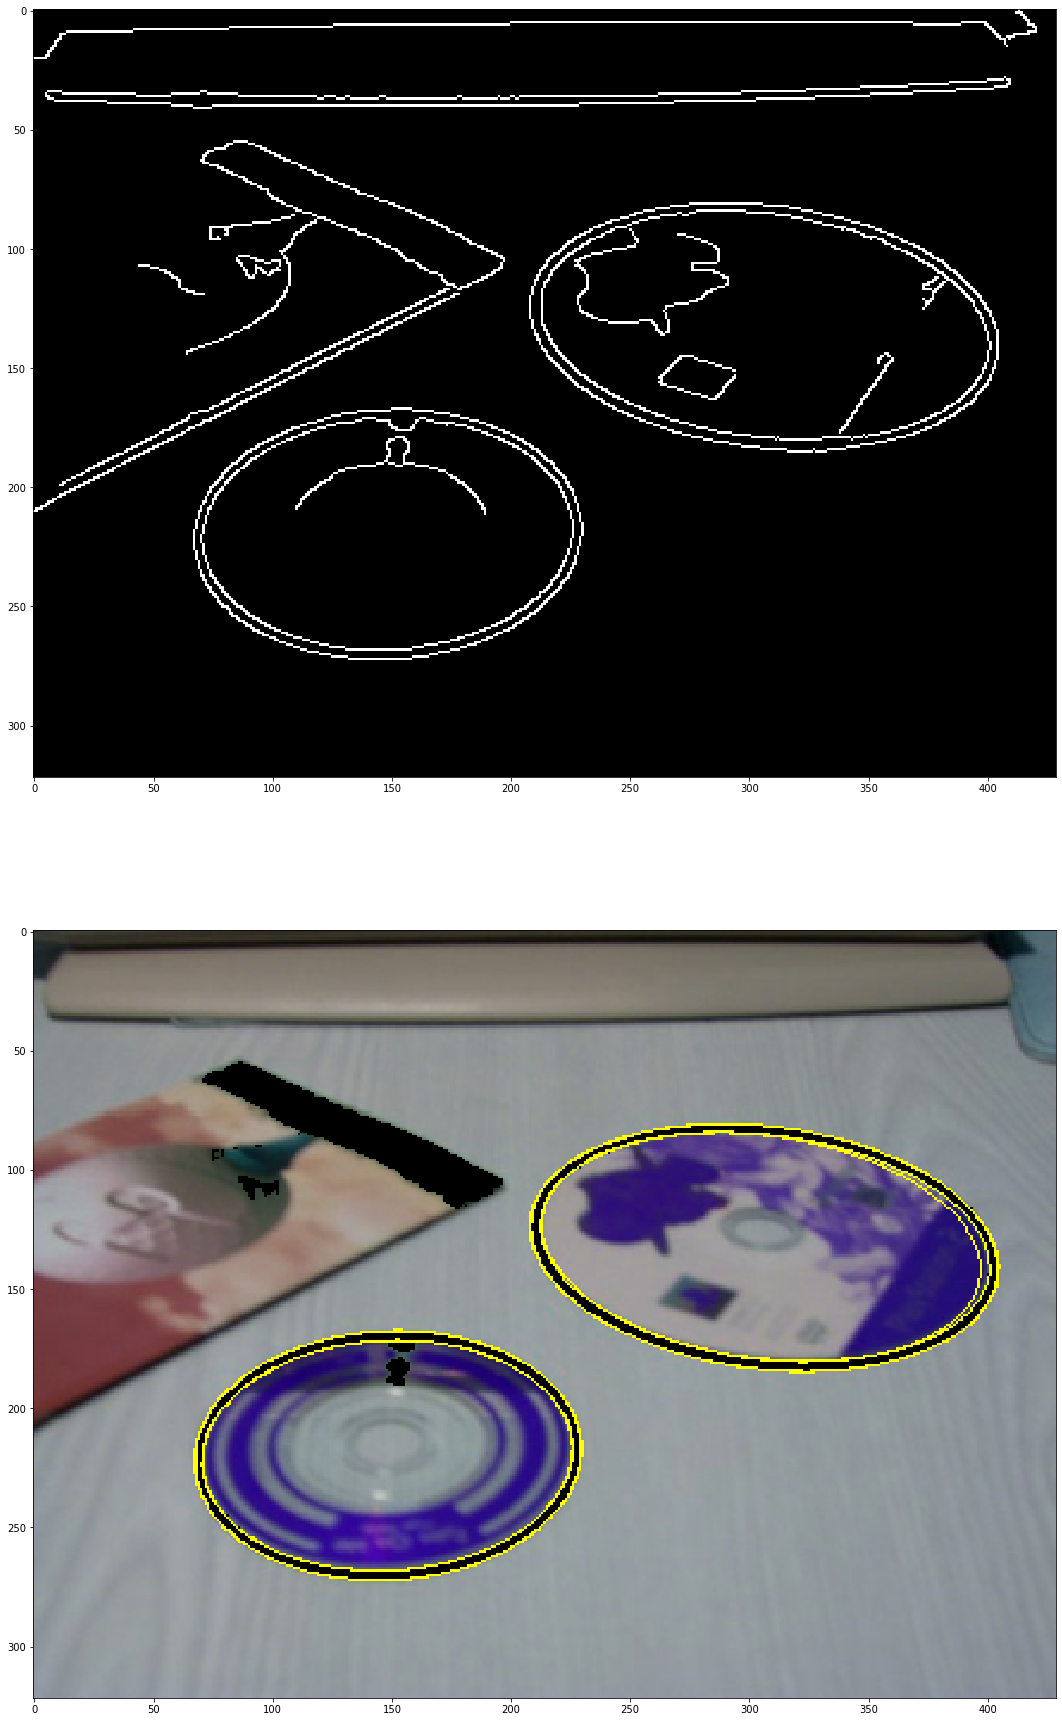

In [110]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

fig=plt.figure(figsize=(32, 48))

img = cv2.imread('ellipse.png')  

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
green = np.uint8([[[0,255,0]]])
range1 = [20,200,200]
range2 = [20,0,0]
hsv_green = cv2.cvtColor(green, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, hsv_green-range1, hsv_green+range2) > 0
img = img - img * np.stack((mask,mask,mask), 2)

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  
blur = cv2.GaussianBlur(gray,(3, 3),0).astype(int)
# fig.add_subplot(3, 1, 3)   # subplot one
# plt.imshow(blur.astype('uint8'), cmap=plt.cm.gray)
sub = gray.astype(int) - blur
sharped_img = np.clip(gray.astype(int) + sub*2, a_min = 0, a_max = 255).astype('uint8')
# fig.add_subplot(5, 1, 1)   # subplot one
# plt.imshow(gray, cmap=plt.cm.gray)

fig.add_subplot(3, 1, 1)   # subplot one
edges = cv2.Canny(blur.astype('uint8'), 85, 85*3, apertureSize=3)
plt.imshow(edges, cmap=plt.cm.gray)
  
contours, hierarchy = cv2.findContours(edges,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
# cv2.drawContours(img,contours,-1,(255,0,0),1)
# fig.add_subplot(5, 1, 4)   # subplot one
# plt.imshow(img)

for i, cnt in enumerate(contours):
    if len(cnt)>50:
        S1=cv2.contourArea(cnt)
        ell=cv2.fitEllipse(cnt)
        S2 =math.pi*ell[1][0]*ell[1][1]
        if (S1/S2)>0.22 :
            img = cv2.ellipse(img, ell, (255, 255, 0), 1)
            print(str(S1) + "    " + str(S2)+"   "+str(ell[0][0])+"   "+str(ell[0][1]))
fig.add_subplot(3, 1, 2)   # subplot one
plt.imshow(img)

plt.show()

## (x, y), (MAx, may), angle = cv2.fitEllipse(lipHull)

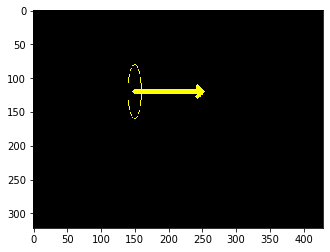

In [32]:

ii = np.zeros((322,429,3), 'uint8')
angal = 0
ii = cv2.ellipse(ii, ((150, 120), (20, 80), angal), 
                  (255, 255, 0), 1)
dx = int(100 * math.cos(math.radians(angal)))
dy = int(100 * math.sin(math.radians(angal)))
cv2.arrowedLine(ii, (150, 120), (150+dx, 120+dy), (255,255,0), 5)

plt.imshow(ii)
plt.show()

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
img = cv2.imread('e1.jpg')  
img = cv2.resize(img, (img.shape[1]//4, img.shape[0]//4))
plt.imshow(edges, cmap=plt.cm.gray)

### Hough Transform

contours #0
(478.22222222222223, 475.77777777777777) 83.93449827097318
No result 169.0/315, a/b 13.989083045162197
contours #2
(287.44444444444446, 453.55555555555554) 79.02531240052139
b = 48.666666666666664, theta=0.05817764173314432
contours #3
(288.0, 453.55555555555554) 79.02531240052139
No result 78.0/494, a/b 1.6532492134000292
contours #8
(257.0, 262.0) 80.30566605165541
b = 45.0, theta=3.0426906626434476
contours #9
(256.0, 262.0) 80.30566605165541
b = 44.666666666666664, theta=3.0426906626434476
contours #13
(255.55555555555554, 268.8888888888889) 48.91829923454004
No result 38.97435897435897/398, a/b 6.445316453199532
contours #30
(110.0, 259.0) 149.40548852033515
No result 143.25/691, a/b 7.288072610748056
contours #46
(62.0, 519.0) 37.013511046643494
No result 69.25/376, a/b 9.655698533906998
contours #47
(62.77777777777778, 105.11111111111111) 55.00909015790027
No result 112.5/473, a/b 12.22424225731117
contours #51
(51.22222222222222, 441.55555555555554) 40.2492235949962

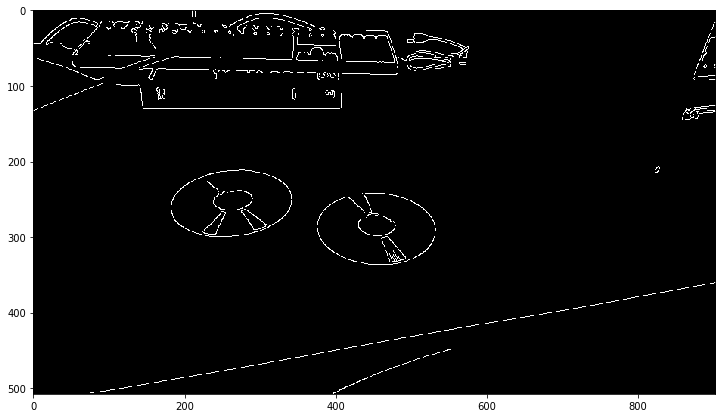

(453.55555555555554, 287.44444444444446, 79.02531240052139, 48.666666666666664, 3.3333333333333335)
(262.0, 257.0, 80.30566605165541, 45.0, 174.33333333333334)
(262.0, 256.0, 80.30566605165541, 44.666666666666664, 174.33333333333334)


In [33]:
img = cv2.imread('e1.jpg')  
img = cv2.resize(img, (img.shape[1]//4, img.shape[0]//4))

imgC = np.copy(img)
empty = np.zeros_like(img)
fig=plt.figure(figsize=(32, 24))
gray = cv2.cvtColor(imgC,cv2.COLOR_BGR2GRAY)  
# gray = np.copy(imgC[:,:,0])
blur = cv2.GaussianBlur(gray,(5, 5),0).astype(int)
fig.add_subplot(3, 1, 1)   # subplot one
edges = cv2.Canny(blur.astype('uint8'), 85, 85*3, apertureSize=3)
plt.imshow(edges, cmap=plt.cm.gray)
cv2.imwrite('result/edges.png', edges)

candidate = []
contours, hierarchy = cv2.findContours(edges,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
for i, cnt in enumerate(contours):
    if len(cnt) > 200 and len(cnt) < 1000:
        draw = np.zeros((img.shape[0]*2, img.shape[1]*2, 3), 'uint8')
        print('contours #{}'.format(i))
        cnt = cnt.reshape(-1,2)
        x = np.arange(img.shape[1])
        y = np.arange(img.shape[0])
        xv, yv = np.meshgrid(x,y)
        max_distance = np.zeros((img.shape[0], img.shape[1]), int)
        for pt in cnt:
            distance = np.sqrt((xv - pt[0])**2 + (yv - pt[1])**2)
            max_distance = np.maximum(max_distance, distance)
        ind = np.argpartition(max_distance.reshape(-1), 9)[:9]
        center_x, center_y = np.unravel_index(ind, max_distance.shape)
        center= (center_x.sum()/len(center_x), center_y.sum()/len(center_y))
        a = np.min(max_distance)
        print(center, a)
        cv2.drawContours(imgC,[cnt],-1,(0,0,255),1)
        cv2.drawContours(empty,[cnt],-1,(255,255,255),1)
        cv2.circle(imgC,(round(center[1]), round(center[0])), 5, (0,0,255), 1)
        cv2.circle(empty,(round(center[1]), round(center[0])), 5, (0,0,255), 1)
        draw[:imgC.shape[0], :imgC.shape[1]] = imgC
        draw[imgC.shape[0]:, :imgC.shape[1]] = empty
        draw[:imgC.shape[0], imgC.shape[1]:] = cv2.cvtColor(((max_distance/np.max(max_distance))*255).astype('uint8'), cv2.COLOR_GRAY2BGR)
        draw[imgC.shape[0]:, imgC.shape[1]:] = [255, 255, 255]
        imgC = np.copy(img)
        empty = np.zeros_like(img)
        
        hough_space = np.zeros((int(a+1), 180), 'int')
        for pt in cnt:
            for w in range(1,180):      #theta
                G=w*math.pi/180
                XX=((pt[0]-center[1])*math.cos(G)+(pt[1]-center[0])*math.sin(G))**2/(a**2)
                YY=(-(pt[0]-center[1])*math.sin(G)+(pt[1]-center[0])*math.cos(G))**2
                B=round(math.sqrt(abs(YY/(1-XX)))+1)
                if B>0 and B<=a:
                     hough_space[B,w] = hough_space[B,w]+1
        max_para = hough_space.max()
        b, w = np.where(hough_space > max_para - len(cnt)/20)
        max_para = hough_space[b,w]
        max_para = max_para.sum()/len(max_para)
        bb = b.sum()/len(b)
        ww = w.sum()/len(w)
        hough_space = ((hough_space/hough_space.max()) * 255).astype('uint8')
        hough_space = cv2.cvtColor(hough_space, cv2.COLOR_GRAY2BGR)
        hough_space[b,w] = [0,0,255]
        
        if max_para <= len(cnt)*0.20 or a/bb > 2.5:
            print('No result {}/{}, a/b {}'.format(max_para, len(cnt), a/bb))
        else:
            print('b = {}, theta={}'.format(bb, ww*math.pi/180))
            candidate.append((center[1], center[0], a, bb, ww)) # (u, v, a, b, theta)
            tmp = np.copy(img)
            tmp = cv2.ellipse(tmp, ((center[1], center[0]), (a*2, bb*2), ww), (255, 255, 255), 2)
            draw[imgC.shape[0]:, imgC.shape[1]:] = tmp
            cv2.imshow('result', tmp)
            cv2.waitKey(0)
            cv2.destroyAllWindows()
        hough_space = cv2.resize(hough_space.astype('uint8'), (hough_space.shape[1]*2, hough_space.shape[0]*2), interpolation=cv2.INTER_NEAREST)
        draw[-hough_space.shape[0]:, imgC.shape[1]:imgC.shape[1]+hough_space.shape[1]] = hough_space
        cv2.imwrite('result/draw_{}.png'.format(i), draw)
        
plt.show()

for cand in candidate:
    print(cand)

In [31]:
for (u,v,a,b,theta) in candidate:
    angle = math.pi*theta/180.0
    ca = math.cos(angle)
    sa = math.sin(angle)
    cx = img.shape[1]/2
    cy = img.shape[0]/2
    Re = np.array([[ca, -sa], 
                   [sa,  ca]])
    ABInvTAB = np.array([[1./(a*a), 0.], 
                         [0., 1./(b*b)]]);
    X0 = np.array([u-cx, v-cy])
    M = Re @ ABInvTAB @ Re.T
    Mf = X0.T @ M @ X0;
    A = M[0,0];
    B = M[0,1];
    C = M[1,1];
    D = - A * X0[0] - B * X0[1];
    E = - B * X0[0] - C * X0[1];
    F = Mf - 1.0;

    Q = np.array([[A, B, D],
                  [B, C, E],
                  [D, E, F]]);
    print(Q)

[[ 1.61014182e-04 -1.52133930e-05  1.77829882e-04]
 [-1.52133930e-05  4.21331973e-04 -1.40599418e-02]
 [ 1.77829882e-04 -1.40599418e-02 -5.30138597e-01]]
[[1.58365669e-04 3.32864117e-05 2.99104350e-02]
 [3.32864117e-05 4.90524292e-04 4.83620215e-03]
 [2.99104350e-02 4.83620215e-03 4.65351883e+00]]
[[1.58437798e-04 3.40133322e-05 2.99559361e-02]
 [3.40133322e-05 4.97850219e-04 5.44982602e-03]
 [2.99559361e-02 5.44982602e-03 4.66575024e+00]]


In [ ]:
XX = pow(((contour.at(k).y - point_center.y)*cos(G) + (contour.at(k).x - point_center.x)*sin(G)), 2) / (a*a);
YY = pow((-(contour.at(k).y - point_center.y)*sin(G) + (contour.at(k).x - point_center.x)*cos(G)), 2);